In [1]:
from sklearn.impute import SimpleImputer

import os
import pandas as pd
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, datasets
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve

import scikitplot as skplt
import matplotlib.pyplot as plt

In [2]:
loan_training_set4 = pd.read_csv('Loan_training_set_4_4.csv', sep = ',' , skiprows=1, skipfooter=2, engine = "python")
loan_training_set3 = pd.read_csv('Loan_training_set_3_4.csv', sep = ',' , skiprows=1, skipfooter=2, engine = "python")
loan_training_set2 = pd.read_csv('Loan_training_set_2_4.csv', sep = ',' , skiprows=1, skipfooter=2, engine = "python")
loan_training_set1 = pd.read_csv('Loan_training_set_1_4.csv', sep = ',' , skiprows=1, skipfooter=2, engine = "python")
frames = [loan_training_set1, loan_training_set2, loan_training_set3,loan_training_set4]
total_lendingclub = pd.concat(frames)

In [3]:
df = total_lendingclub.loc[:, loan_training_set1.columns.isin(["loan_status", "annual_inc",
"annual_inc_joint",
"application_type",
"dti",
"dti_joint",
"emp_length",
"grade",
"home_ownership",
"loan_amnt",
"mort_acc",
"open_act_il",
"open_rv_12m",
"pct_tl_nvr_dlq",
"pub_rec",
"pub_rec_bankruptcies",
"purpose",
"term",
"tot_coll_amt"
"tot_cur_bal",
"total_acc",
"int_rate"
])]



In [4]:
df = df[df["loan_status"]!="Current"]

In [5]:
df.isnull().sum()

loan_amnt                    0
term                         0
int_rate                     0
grade                        0
emp_length               25086
home_ownership               0
annual_inc                   0
loan_status                  0
purpose                      0
dti                         21
pub_rec                      0
total_acc                    0
application_type             0
annual_inc_joint        460541
dti_joint               460541
open_act_il             430839
open_rv_12m             430839
mort_acc                     0
pct_tl_nvr_dlq               0
pub_rec_bankruptcies         0
dtype: int64

# Variables numéricas

In [5]:
int_numeric = df["int_rate"].str.strip("%")
int_numeric = pd.to_numeric(int_numeric)
df["int_rate"] = int_numeric


In [6]:
from sklearn.impute import SimpleImputer

numericas = df.select_dtypes(exclude=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [7]:
numericas_df = df.select_dtypes(exclude=['object'])

In [8]:
numericas_df

,loan_amnt,int_rate,annual_inc,dti,pub_rec,total_acc,annual_inc_joint,dti_joint,open_act_il,open_rv_12m,mort_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies
8,11575,7.35,153000.0,16.99,1,46,NaN,NaN,1.0,2.0,2,95.7,1
10,7200,24.85,50000.0,6.07,0,5,NaN,NaN,1.0,0.0,0,80.0,0
24,7500,7.35,110000.0,13.12,0,27,NaN,NaN,4.0,1.0,4,100.0,0
42,10000,16.02,51979.0,10.11,2,21,NaN,NaN,1.0,2.0,0,100.0,2
91,14000,16.02,75000.0,10.86,0,10,NaN,NaN,2.0,2.0,1,90.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421088,11575,15.59,25400.0,27.08,0,18,NaN,NaN,NaN,NaN,0,100.0,0
421089,12000,11.99,63000.0,23.69,0,61,NaN,NaN,NaN,NaN,1,98.3,0
421092,13000,15.99,35000.0,30.90,1,22,NaN,NaN,NaN,NaN,0,100.0,1
421093,12000,19.99,64400.0,27.19,0,20,NaN,NaN,NaN,NaN,0,95.0,0


## Variables categóricas

In [9]:
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [10]:
categoricas = df.select_dtypes(include=['object']).drop(['loan_status'], axis=1).columns

categoricas

Index(['term', 'grade', 'emp_length', 'home_ownership', 'purpose',
       'application_type'],
      dtype='object')

In [11]:
categoricas_df = df.select_dtypes(include=['object']).drop(['loan_status'], axis=1)

In [12]:
categoricas_df

,term,grade,emp_length,home_ownership,purpose,application_type
8,36 months,A,6 years,OWN,credit_card,Individual
10,36 months,E,2 years,RENT,debt_consolidation,Individual
24,36 months,A,7 years,MORTGAGE,debt_consolidation,Individual
42,60 months,C,7 years,RENT,debt_consolidation,Individual
91,36 months,C,7 years,MORTGAGE,debt_consolidation,Individual
...,...,...,...,...,...,...
421088,36 months,D,10+ years,RENT,credit_card,Individual
421089,36 months,B,< 1 year,MORTGAGE,credit_card,Individual
421092,60 months,D,5 years,RENT,debt_consolidation,Individual
421093,60 months,E,1 year,RENT,debt_consolidation,Individual


## Concatenación

In [13]:
loan_status = pd.DataFrame(df['loan_status'])

In [14]:
lendingclub = pd.concat([numericas_df, loan_status, categoricas_df],  axis=1)

In [15]:
from sklearn.compose import ColumnTransformer


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numericas),
        ('cat', categorical_transformer, categoricas)])

In [16]:
lendingclub['loan_status'].mask(lendingclub['loan_status'] == 'Fully Paid', 1, inplace=True)
lendingclub['loan_status'].mask(lendingclub['loan_status'] != 1, 0, inplace=True)
lendingclub

,loan_amnt,int_rate,annual_inc,dti,pub_rec,total_acc,annual_inc_joint,dti_joint,open_act_il,open_rv_12m,mort_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,loan_status,term,grade,emp_length,home_ownership,purpose,application_type
8,11575,7.35,153000.0,16.99,1,46,NaN,NaN,1.0,2.0,2,95.7,1,1,36 months,A,6 years,OWN,credit_card,Individual
10,7200,24.85,50000.0,6.07,0,5,NaN,NaN,1.0,0.0,0,80.0,0,1,36 months,E,2 years,RENT,debt_consolidation,Individual
24,7500,7.35,110000.0,13.12,0,27,NaN,NaN,4.0,1.0,4,100.0,0,1,36 months,A,7 years,MORTGAGE,debt_consolidation,Individual
42,10000,16.02,51979.0,10.11,2,21,NaN,NaN,1.0,2.0,0,100.0,2,1,60 months,C,7 years,RENT,debt_consolidation,Individual
91,14000,16.02,75000.0,10.86,0,10,NaN,NaN,2.0,2.0,1,90.0,0,1,36 months,C,7 years,MORTGAGE,debt_consolidation,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421088,11575,15.59,25400.0,27.08,0,18,NaN,NaN,NaN,NaN,0,100.0,0,1,36 months,D,10+ years,RENT,credit_card,Individual
421089,12000,11.99,63000.0,23.69,0,61,NaN,NaN,NaN,NaN,1,98.3,0,0,36 months,B,< 1 year,MORTGAGE,credit_card,Individual
421092,13000,15.99,35000.0,30.90,1,22,NaN,NaN,NaN,NaN,0,100.0,1,0,60 months,D,5 years,RENT,debt_consolidation,Individual
421093,12000,19.99,64400.0,27.19,0,20,NaN,NaN,NaN,NaN,0,95.0,0,0,60 months,E,1 year,RENT,debt_consolidation,Individual


# Voting Classifier

Un clasificador de votación es un modelo de aprendizaje automático que se entrena en un conjunto de numerosos modelos y predice una salida (clase) en función de su probabilidad más alta de la clase elegida como salida.
Simplemente agrega los resultados de cada clasificador pasado al Voting Classifier y predice la clase de salida según la mayoría más alta de votaciones. La idea es, en lugar de crear modelos dedicados separados y encontrar la precisión para cada uno de ellos, creamos un modelo único que se entrena con estos modelos y predice la salida en función de su mayoría combinada de votación para cada clase de salida.

Voting Classifier admite dos tipos de votaciones.

* **Hard Voting**: En la votación dura, la clase de salida prevista es una clase con la mayoría más alta de votos, es decir, la clase que tenía la mayor probabilidad de ser predicha por cada uno de los clasificadores. Supongamos que tres clasificadores predijeron la clase de salida (A, A, B) , por lo que aquí la mayoría predijo A como salida. Por tanto, A será la predicción final.
* **Soft Voting**: en el voto suave, la clase de salida es la predicción basada en el promedio de probabilidad dado a esa clase. Suponga que dada alguna entrada a tres modelos, la probabilidad de predicción para la clase A = (0.30, 0.47, 0.53) y B = (0.20, 0.32, 0.40) . Entonces, el promedio para la clase A es 0.4333 y B es 0.3067 , el ganador es claramente la clase A porque tuvo la probabilidad más alta promediada por cada clasificador.

In [27]:
from sklearn.model_selection import train_test_split
a =lendingclub.sample(n=70000, random_state=1234)


X = a.drop('loan_status', axis=1)
y = a['loan_status']


y = y.astype("int")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
clf1 = LogisticRegression(C= 0.19,penalty= 'l2', solver="sag")
clf2 = SVC(kernel='linear',C= 10)
clf3 = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

In [23]:
voting = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', VotingClassifier(estimators=[('lr', clf1), ('SVC', clf2), ('SGDClassifier', clf3)]))])

In [ ]:
voting.fit(X_train, y_train)

C:\Users\Apuntes\anaconda\envs\lendingclub\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [ ]:
y_pred = voting.predict(X_test)

In [ ]:
print('Accuracy: %.4f'%accuracy_score(y_test, y_pred))
print('AUC: %.4f'%roc_auc_score(y_test, y_pred))
print('F1-Score: %.4f'%f1_score(y_test, y_pred))

print('\nClassification Report                       : ')
print(classification_report(y_test, y_pred))


# SCORING MODELO FINAL

In [58]:
print('Accuracy: %.4f'%accuracy_score(y_test, y_pred))
print('AUC: %.4f'%roc_auc_score(y_test, y_pred))
print('F1-Score: %.4f'%f1_score(y_test, y_pred))

print('\nClassification Report                       : ')
print(classification_report(y_test, y_pred))


Accuracy: 0.7591
AUC: 0.5454
F1-Score: 0.8584

Classification Report                       : 
              precision    recall  f1-score   support

           0       0.60      0.12      0.20      3509
           1       0.77      0.97      0.86     10491

    accuracy                           0.76     14000
   macro avg       0.68      0.55      0.53     14000
weighted avg       0.73      0.76      0.69     14000



In [65]:
# Save to file in the current working directory
rf_pkl = "random_forest.pkl"
with open(rf_pkl, 'wb') as file:
    pickle.dump(rf, file)

NameError: name 'rf' is not defined

# PLOTING

Confusion matrix, without normalization
[[  75  413]
 [  60 1452]]
Normalized confusion matrix
[[0.15368852 0.84631148]
 [0.03968254 0.96031746]]


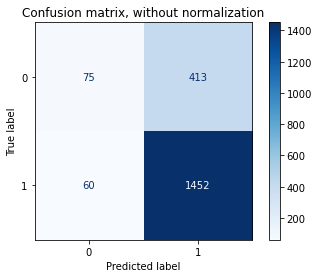

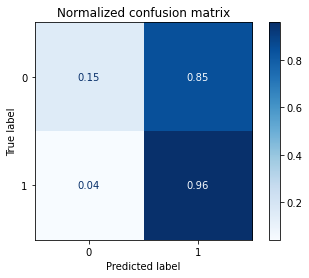

In [52]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [53]:
prob_predictions = svc.predict_proba(X_test)


AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [54]:
# keep probabilities for the positive outcome only
yhat = prob_predictions[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

NameError: name 'prob_predictions' is not defined

In [58]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

In [59]:
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.738036, G-Mean=0.647


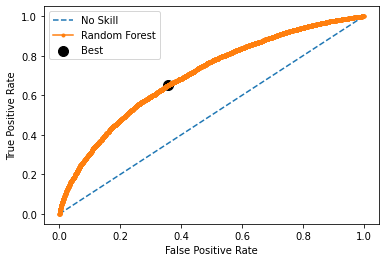

In [61]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], s=100, marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [62]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

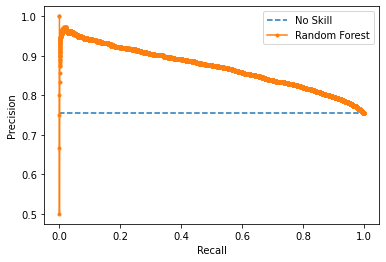

In [65]:
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [68]:
skplt.metrics.plot_cumulative_gain(y_test, prob_predictions)
plt.show()

ModuleNotFoundError: No module named 'scikitplot'